# CR 6 RSM

## Read data and save relevant variables.

In [1]:
## Read data and save relevant variables.
fname = "https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_all.dat"
m = matrix(scan(fname,skip=1,sep = ","),ncol=14,byrow=T)

In [2]:
## Install R Packages 
install.packages("rsm")
library(rsm)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Main Effects

In [3]:
## Main Effects
coded_lh = m[,2]
coded_ps = m[,3]
coded_id = m[,4]
coded_rw = m[,5]
coded_wt = m[,6]

## Objectives

In [4]:
## Objectives
cost = m[,7]
time = m[,8]

## Other Values

In [5]:
run = m[,1]
quality = m[,9]

## Actual Values

In [6]:
## Coded Values
lh = m[,10]
ps = m[,11]
id = m[,12]
rw = m[,13]
wt = m[,14]

## Create Data Frame

In [7]:
## Create data frame.
df = data.frame(run,
                coded_lh,coded_ps,coded_id,coded_wt,coded_rw,
                cost,time,quality,
                lh,ps,id,wt,rw)

In [8]:
# Summary of the original data

summary(df)

      run           coded_lh     coded_ps     coded_id     coded_wt 
 Min.   : 1.00   Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1  
 1st Qu.: 5.25   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1  
 Median : 9.50   Median : 0   Median : 0   Median : 0   Median : 0  
 Mean   : 9.50   Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0  
 3rd Qu.:13.75   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1  
 Max.   :18.00   Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1  
    coded_rw       cost             time          quality        lh        
 Min.   :-1   Min.   :0.5000   Min.   : 8598   Min.   :1   Min.   :0.1600  
 1st Qu.:-1   1st Qu.:0.5125   1st Qu.: 9810   1st Qu.:1   1st Qu.:0.1600  
 Median : 0   Median :0.5400   Median :11985   Median :1   Median :0.2000  
 Mean   : 0   Mean   :0.5302   Mean   :12647   Mean   :1   Mean   :0.2178  
 3rd Qu.: 1   3rd Qu.:0.5400   3rd Qu.:15078   3rd Qu.:1   3rd Qu.:0.2800  
 Max.   : 1   Max.   :0.5600   Max.   :17946   Max.   :1   Ma

# Modelling

## Cost

In [9]:
## Fit full model (Cost).
z = lm(cost ~ (coded_lh+coded_ps+coded_id+coded_wt+coded_rw)^2,data=df)
summary(z)


Call:
lm(formula = cost ~ (coded_lh + coded_ps + coded_id + coded_wt + 
    coded_rw)^2, data = df)

Residuals:
        1         2         3         4         5         6         7         8 
 0.001278  0.001278  0.001278  0.001278  0.001278  0.001278  0.001278  0.001278 
        9        10        11        12        13        14        15        16 
 0.001278  0.001278  0.001278  0.001278  0.001278  0.001278  0.001278  0.001278 
       17        18 
-0.010222 -0.010222 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.530222   0.002556 207.478 2.32e-05 ***
coded_lh          -0.002250   0.002711  -0.830    0.494    
coded_ps           0.002250   0.002711   0.830    0.494    
coded_id          -0.001500   0.002711  -0.553    0.636    
coded_wt          -0.004000   0.002711  -1.476    0.278    
coded_rw           0.013500   0.002711   4.980    0.038 *  
coded_lh:coded_ps  0.001000   0.002711   0.369    0.748    
coded_lh:coded_id  0.00225

In [10]:
## Perform stepwise regression.
zz = step(z,direction="both")

Start:  AIC=-170.42
cost ~ (coded_lh + coded_ps + coded_id + coded_wt + coded_rw)^2

                    Df Sum of Sq        RSS     AIC
- coded_lh:coded_ps  1  0.000016 0.00025111 -171.24
<none>                           0.00023511 -170.43
- coded_lh:coded_wt  1  0.000081 0.00031611 -167.10
- coded_ps:coded_id  1  0.000081 0.00031611 -167.10
- coded_ps:coded_rw  1  0.000081 0.00031611 -167.10
- coded_lh:coded_id  1  0.000081 0.00031611 -167.10
- coded_lh:coded_rw  1  0.000081 0.00031611 -167.10
- coded_ps:coded_wt  1  0.000081 0.00031611 -167.10
- coded_id:coded_rw  1  0.000196 0.00043111 -161.51
- coded_id:coded_wt  1  0.000576 0.00081111 -150.13
- coded_wt:coded_rw  1  0.001296 0.00153111 -138.70

Step:  AIC=-171.24
cost ~ coded_lh + coded_ps + coded_id + coded_wt + coded_rw + 
    coded_lh:coded_id + coded_lh:coded_wt + coded_lh:coded_rw + 
    coded_ps:coded_id + coded_ps:coded_wt + coded_ps:coded_rw + 
    coded_id:coded_wt + coded_id:coded_rw + coded_wt:coded_rw

               

In [11]:
## generate ANOVA table for selected model
anova(update(zz,~1),zz)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,0.0061751111,NA,NA,NA,NA
2,3,0.0002511111,14,0.005924,5.055247,0.1038652


In [12]:
summary(zz)


Call:
lm(formula = cost ~ coded_lh + coded_ps + coded_id + coded_wt + 
    coded_rw + coded_lh:coded_id + coded_lh:coded_wt + coded_lh:coded_rw + 
    coded_ps:coded_id + coded_ps:coded_wt + coded_ps:coded_rw + 
    coded_id:coded_wt + coded_id:coded_rw + coded_wt:coded_rw, 
    data = df)

Residuals:
         1          2          3          4          5          6          7 
 0.0022778  0.0002778  0.0002778  0.0022778  0.0022778  0.0002778  0.0002778 
         8          9         10         11         12         13         14 
 0.0022778  0.0022778  0.0002778  0.0002778  0.0022778  0.0022778  0.0002778 
        15         16         17         18 
 0.0002778  0.0022778 -0.0102222 -0.0102222 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.530222   0.002156 245.879 1.48e-07 ***
coded_lh          -0.002250   0.002287  -0.984  0.39779    
coded_ps           0.002250   0.002287   0.984  0.39779    
coded_id          -0.001500   0.002287 

In [13]:
## Generate ANOVA table.
anova(zz)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
coded_lh,1,0.0000810000,8.10000e-05,0.9676991,0.397790153
coded_ps,1,0.0000810000,8.10000e-05,0.9676991,0.397790153
coded_id,1,0.0000360000,3.60000e-05,0.4300885,0.558753086
coded_wt,1,0.0002560000,2.56000e-04,3.0584071,0.178636140
coded_rw,1,0.0029160000,2.91600e-03,34.8371681,0.009710772
coded_lh:coded_id,1,0.0000810000,8.10000e-05,0.9676991,0.397790153
coded_lh:coded_wt,1,0.0000810000,8.10000e-05,0.9676991,0.397790153
coded_lh:coded_rw,1,0.0000810000,8.10000e-05,0.9676991,0.397790153
coded_ps:coded_id,1,0.0000810000,8.10000e-05,0.9676991,0.397790153


In [14]:
## Perform lack-of-fit test.
lof = factor(paste(lh,ps,id,wt,rw,lh*id,lh*wt,lh*rw,ps*id,ps*wt,ps*rw,id*wt,id*rw,wt*rw))
inner.model = lm(cost ~ lh + ps + id + wt + rw + lh:id + lh:wt + lh:rw + ps:id + ps:wt + ps:rw + id:wt + id:rw + wt:rw, data = df)
outer.model = lm(cost ~ lof)
anova(inner.model, outer.model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0.0002795244,NA,NA,NA,NA
2,1,0.0000000000,2,0.0002795244,Inf,0


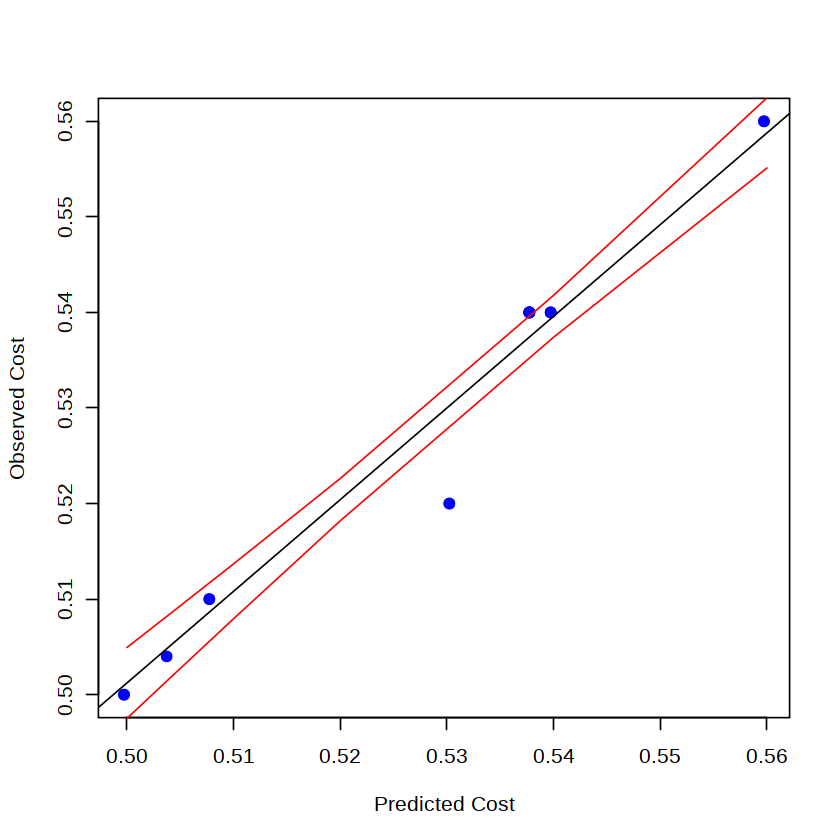

In [15]:
## Plot actual versus predicted.
par(mfrow=c(1,1),bg=rgb(1,1,0.8))
plot(predict(zz),df$cost,ylab="Observed Cost",
     xlab="Predicted Cost", col=4, pch=19)
## Add regression line and confidence bounds to the plot.
rline = lm(predict(zz)~df$cost)
abline(rline)
bnds = data.frame(predict.lm(rline, interval = "confidence"),cost)
bnds = bnds[order(bnds$fit),]
lines(bnds$cost,bnds[,2],col=2)
lines(bnds$cost,bnds[,3],col=2)
par(mfrow=c(1,1))

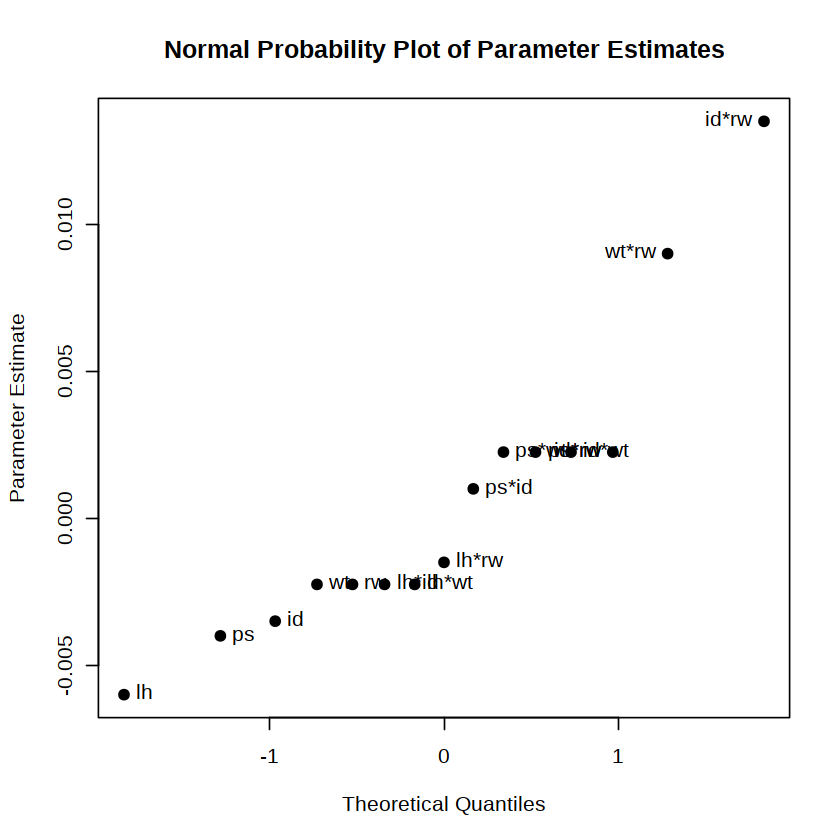

In [16]:
## Generate normal probability plot of the effects.
## Save parameters in a vector, but remove intercept.
qef = z$coef
qef = qef[-1]

## Sort effects and save labels.
sef = qef[order(qef)]
qlab = names(sef)
qlab=c("lh","ps","id","wt","rw","lh*id","lh*wt","lh*rw","ps*id","ps*wt","ps*rw","id*wt","id*rw","wt*rw")

## Generate theoretical quantiles.
ip = ppoints(length(sef))
zp = qnorm(ip)

## Generate normal probability plot of all effects (excluding the
## intercept).  
par(mfrow=c(1,1),bg=rgb(1,1,0.8))
plot(zp, sef, pch=19,
     ylab="Parameter Estimate", xlab="Theoretical Quantiles",
     main="Normal Probability Plot of Parameter Estimates")
##qqline(sef, col=2)
##abline(h=0, col=4)

## Add labels for effects.
small2 = c(1:(length(sef)-3))
text(zp[small2],sef[small2],label=qlab[small2],pos=4,cex=1)
text(zp[-small2],sef[-small2],label=qlab[-small2],pos=2,cex=1)

## Generate Cost Interaction Plots

## Interactions: Layer Height

In [17]:
## Generate interaction plots.
dfp = subset(df,lh==.16|lh==.28)

par(mfrow=c(2,1), bg=rgb(1,1,0.8), mar=c(5, 8, 2, 4))

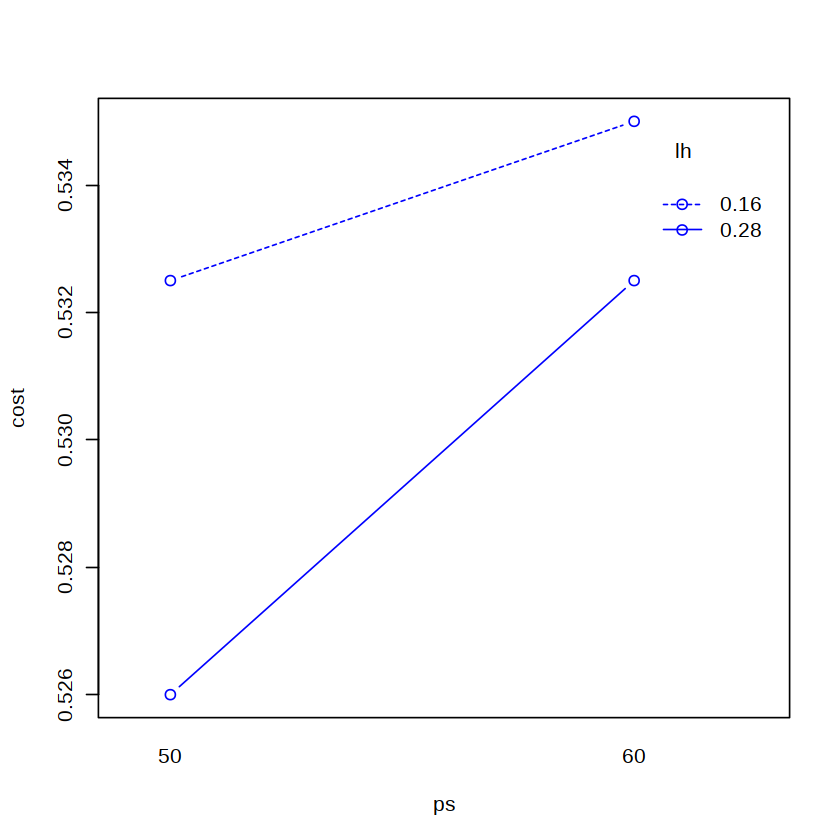

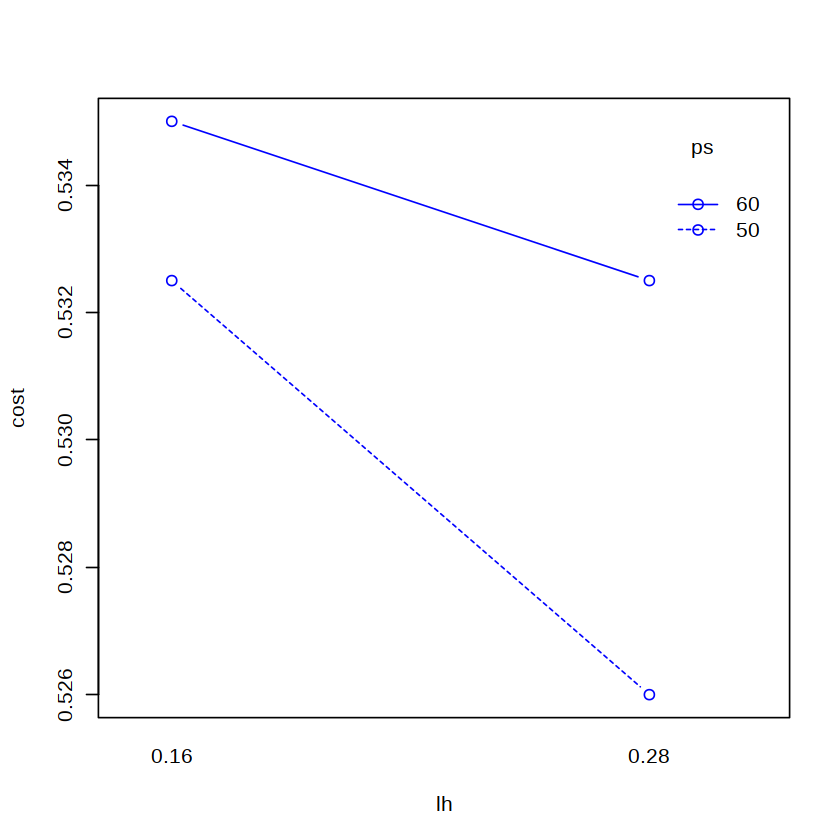

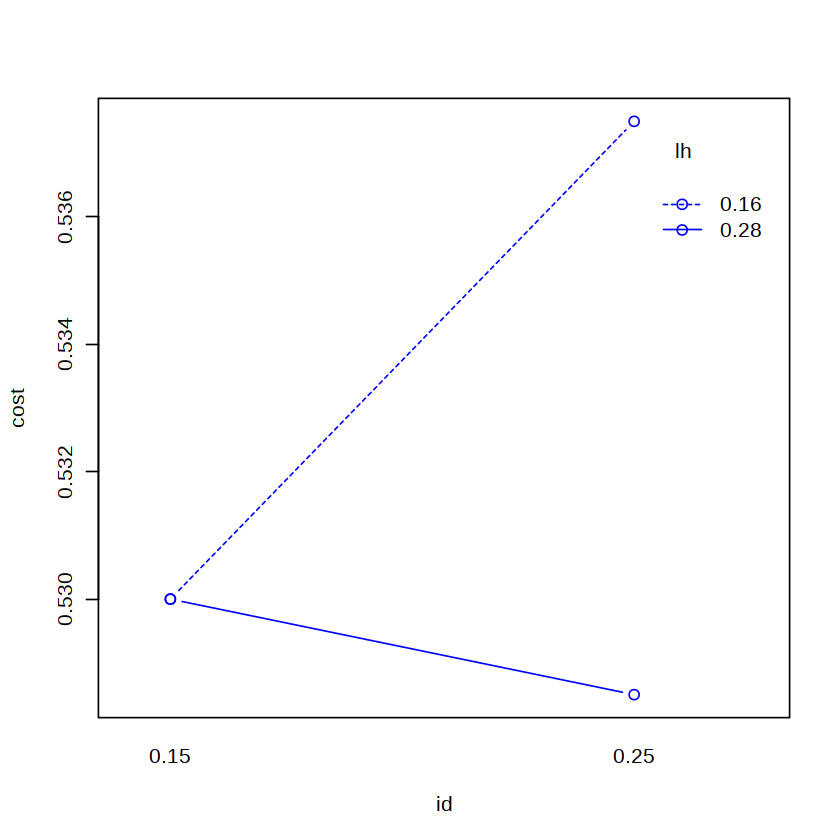

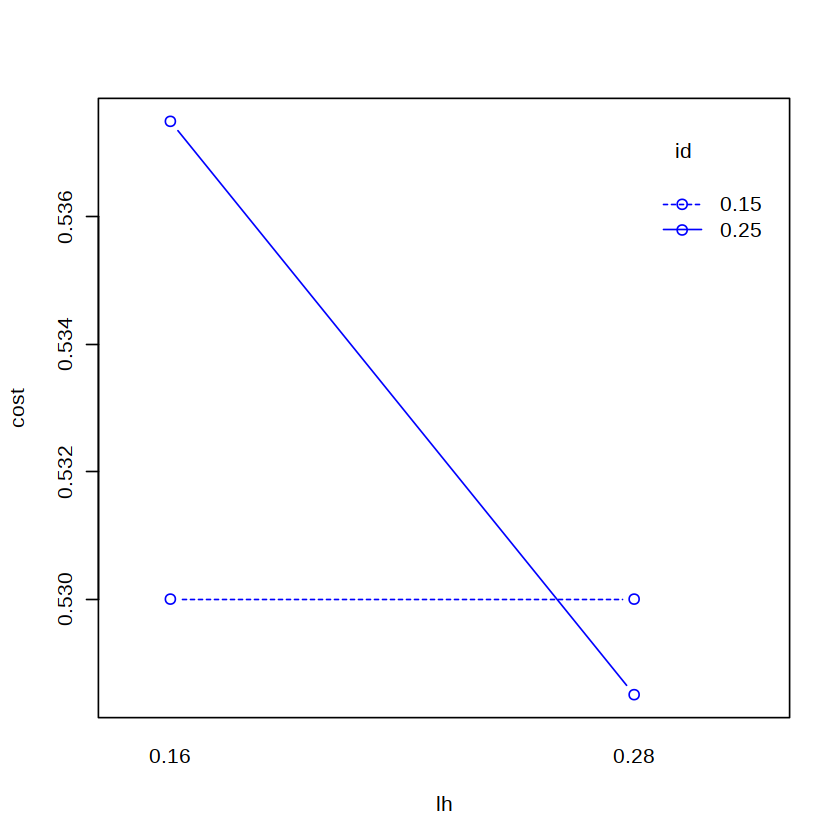

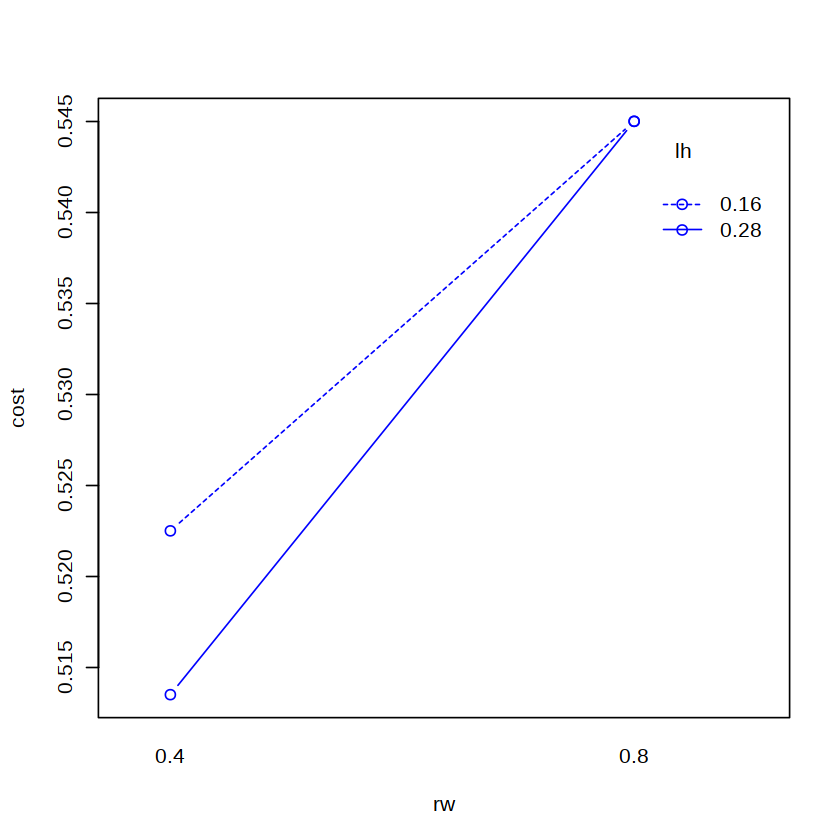

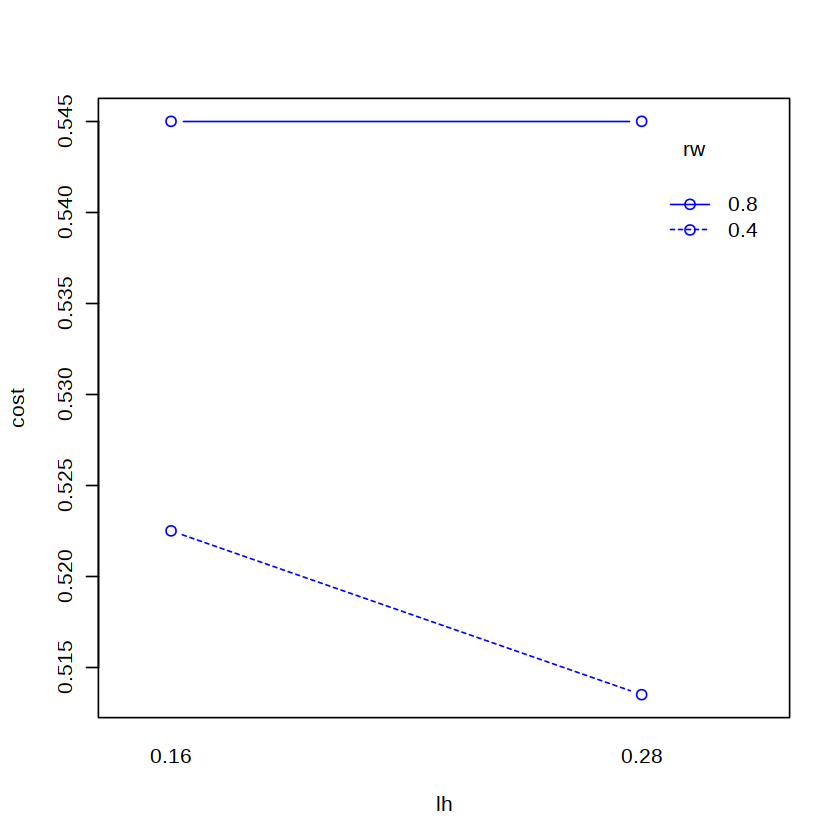

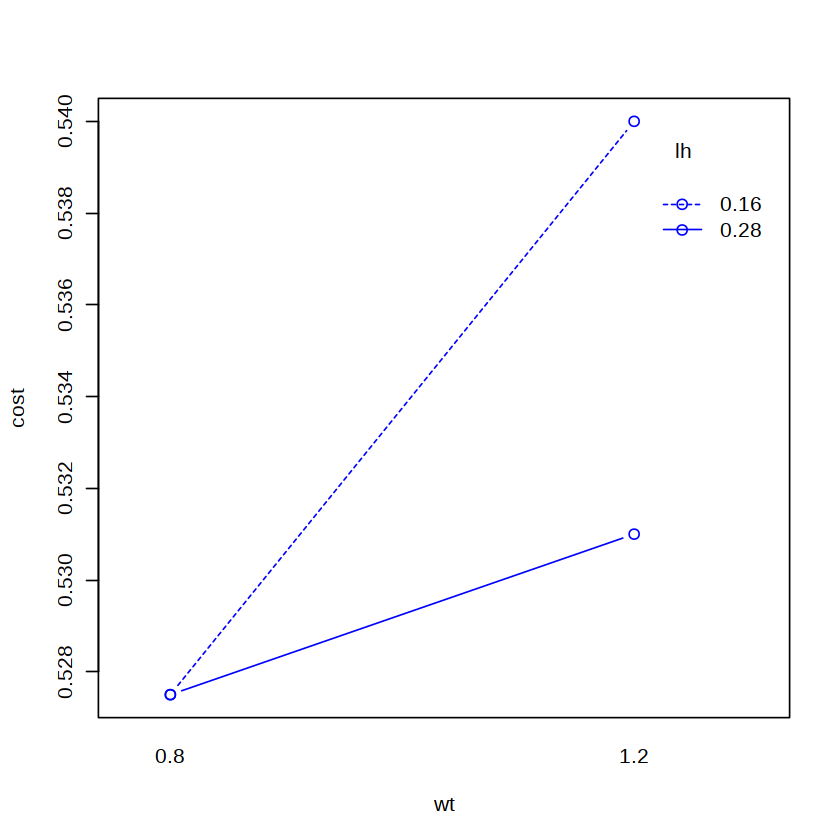

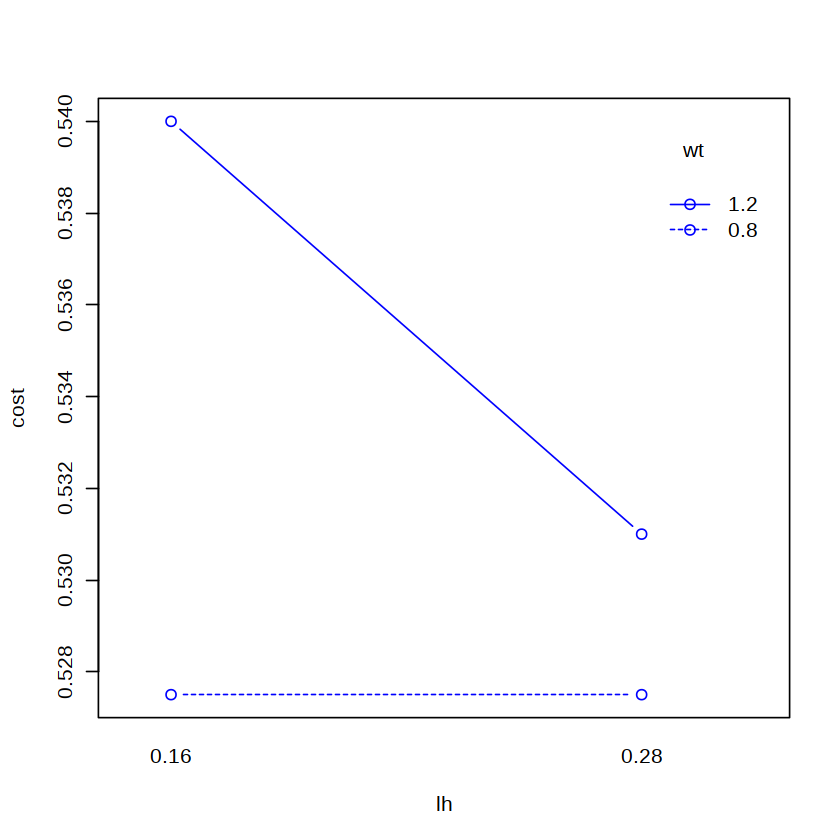

In [18]:
interaction.plot(dfp$ps, dfp$lh, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="ps", ylab="cost", trace.lab="lh")

interaction.plot(dfp$lh, dfp$ps, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="ps", ylab="cost", xlab="lh")

interaction.plot(dfp$id, dfp$lh, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="cost", trace.lab="lh")

interaction.plot(dfp$lh, dfp$id, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="cost", xlab="lh")

interaction.plot(dfp$rw, dfp$lh, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="lh")

interaction.plot(dfp$lh, dfp$rw, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="lh")

interaction.plot(dfp$wt, dfp$lh, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="lh")

interaction.plot(dfp$lh, dfp$wt, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="lh")

## Interactions: Print Speed (ps)

In [19]:
dfp = subset(df,ps==50|ps==60)

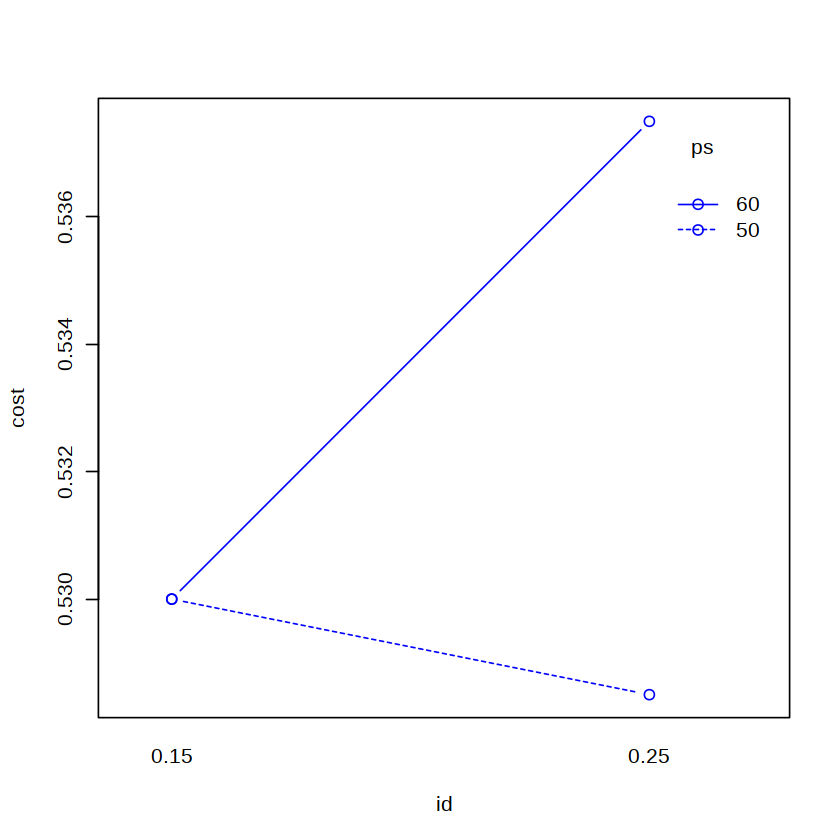

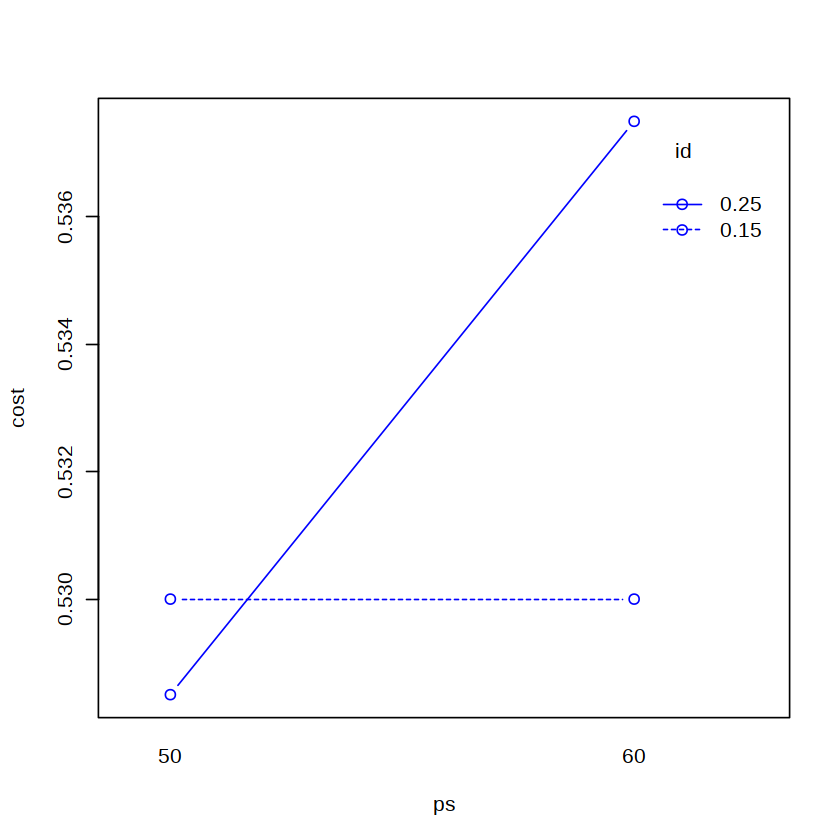

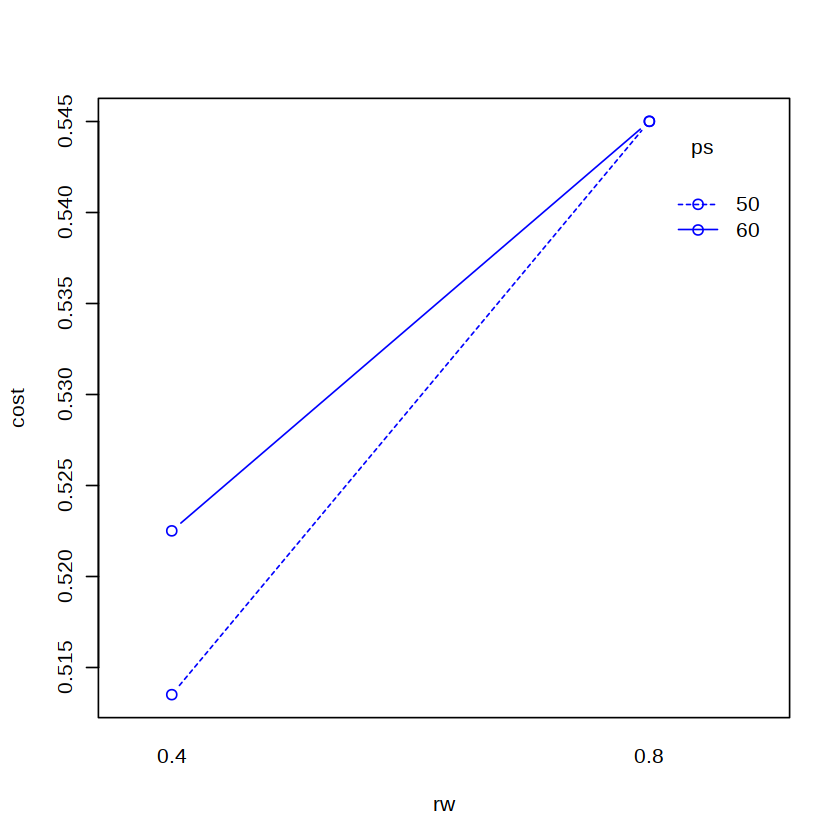

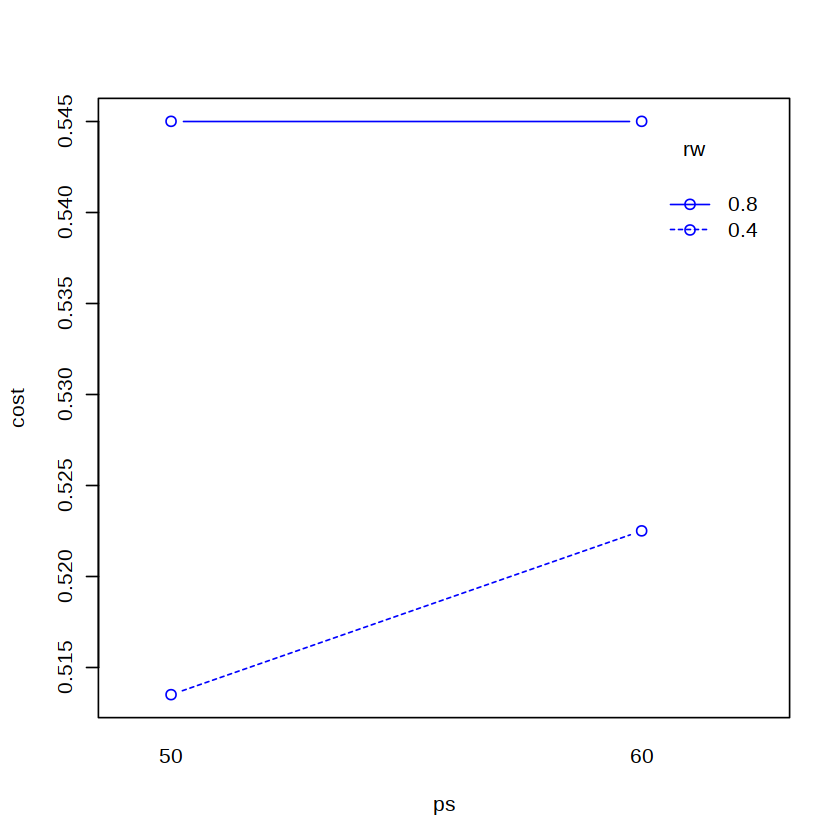

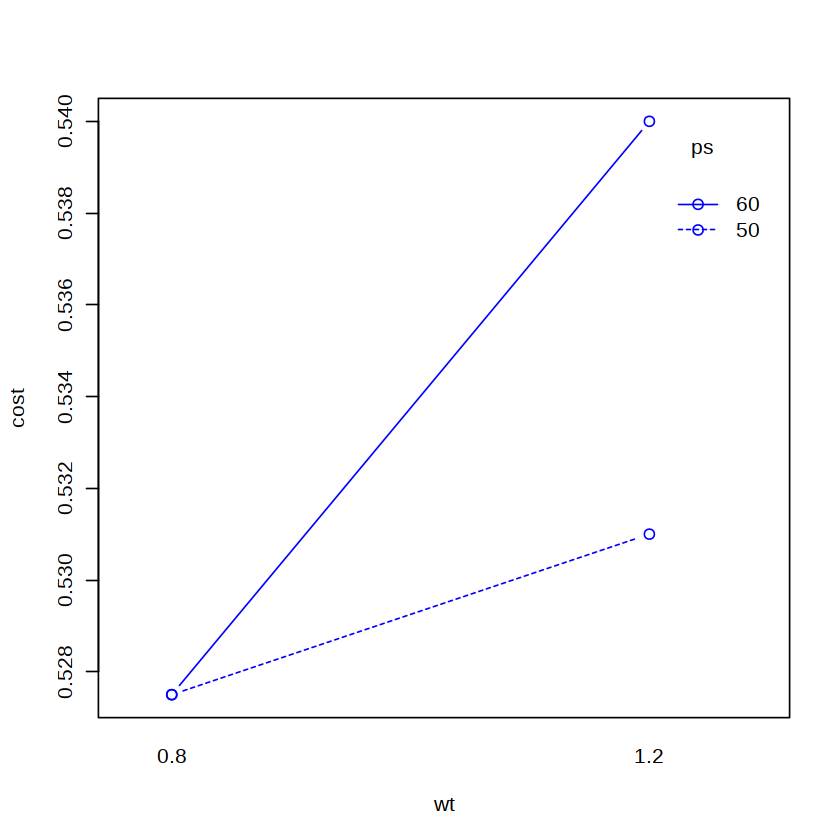

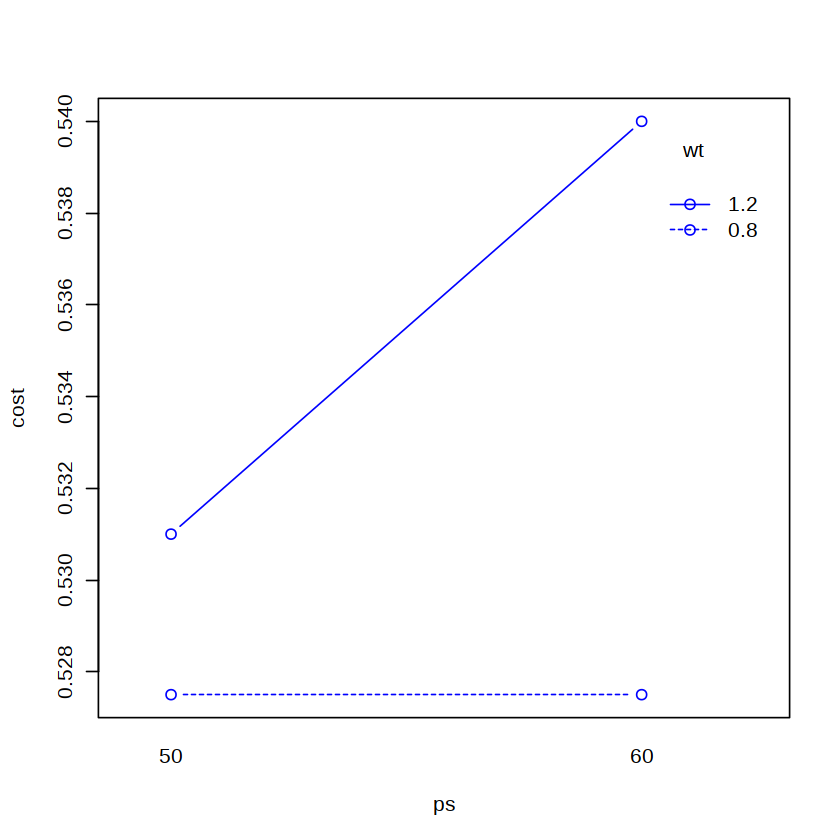

In [20]:
interaction.plot(dfp$id, dfp$ps, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="cost", trace.lab="ps")

interaction.plot(dfp$ps, dfp$id, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="cost", xlab="ps")

interaction.plot(dfp$rw, dfp$ps, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="ps")

interaction.plot(dfp$ps, dfp$rw, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="ps")

interaction.plot(dfp$wt, dfp$ps, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="ps")

interaction.plot(dfp$ps, dfp$wt, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="ps")


## Interactions: Infill Density (id)

In [21]:
dfp = subset(df,id==.15|id==.25)

In [1]:
interaction.plot(dfp$rw, dfp$id, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="id")

interaction.plot(dfp$id, dfp$rw, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="id")

interaction.plot(dfp$wt, dfp$id, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="id")

interaction.plot(dfp$id, dfp$wt, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="id")

ERROR: Error in tapply(response, list(x.factor, trace.factor), fun): object 'df.time' not found


## Interactions: Raster Width (rw)

In [23]:
dfp = subset(df,rw==.4|rw==.8)

### rw vs wt

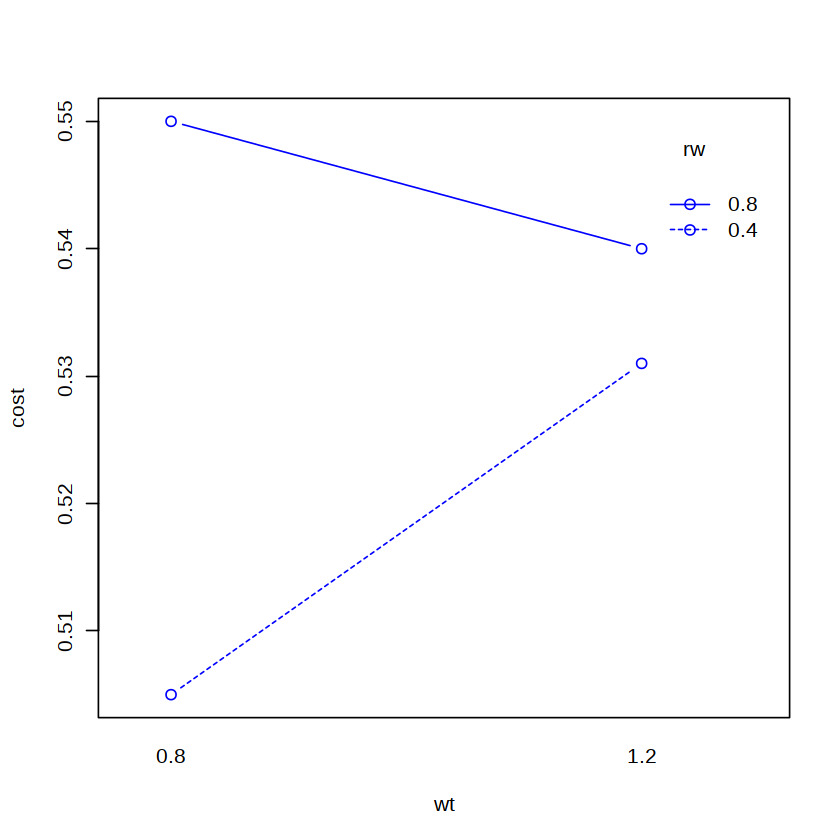

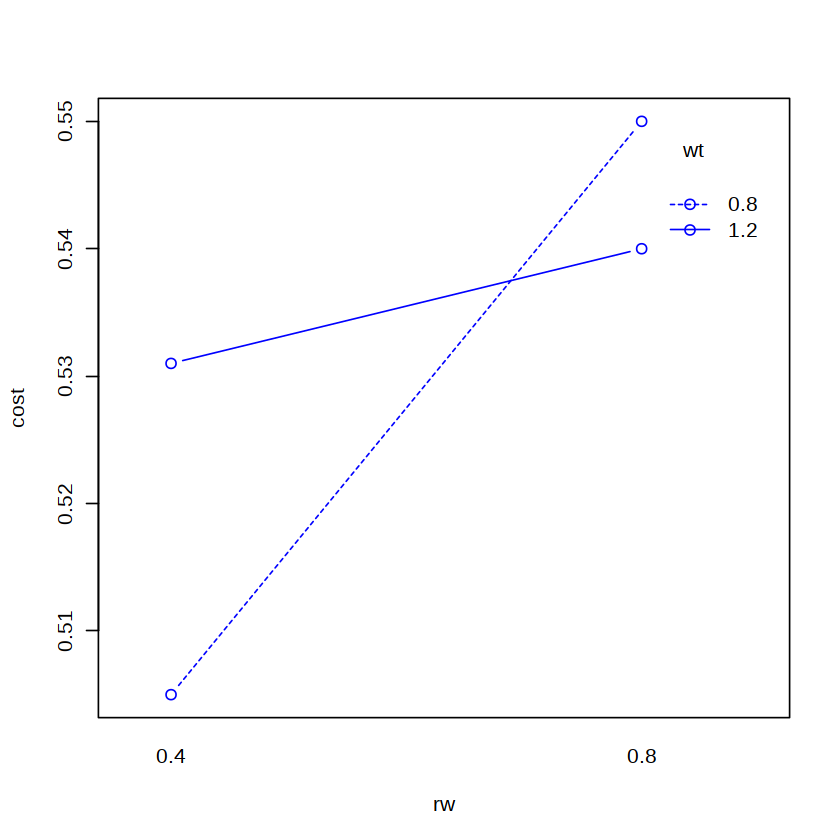

In [24]:
interaction.plot(dfp$wt, dfp$rw, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="rw")

interaction.plot(dfp$rw, dfp$wt, dfp$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="rw")

# Cost Response Surface Models

In [25]:
cost_rsm=rsm(cost ~ SO(lh,ps,id,wt,rw), data=df) 
summary(cost_rsm)

Warning message in rsm(cost ~ SO(lh, ps, id, wt, rw), data = df):
“Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object.”
Warning message in summary.lm(cost_rsm):
“essentially perfect fit: summary may be unreliable”



Call:
rsm(formula = cost ~ SO(lh, ps, id, wt, rw), data = df)

Residuals:
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

Coefficients: (4 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.546333   0.000000     Inf   <2e-16 ***
FO(lh, ps, id, wt, rw)lh     -1.680208   0.000000    -Inf   <2e-16 ***
FO(lh, ps, id, wt, rw)ps     -0.002983   0.000000    -Inf   <2e-16 ***
FO(lh, ps, id, wt, rw)id      0.090000   0.000000     Inf   <2e-16 ***
FO(lh, ps, id, wt, rw)wt      0.192500   0.000000     Inf   <2e-16 ***
FO(lh, ps, id, wt, rw)rw      0.305000   0.000000     Inf   <2e-16 ***
TWI(lh, ps, id, wt, rw)lh:ps  0.003333   0.000000     Inf   <2e-16 ***
TWI(lh, ps, id, wt, rw)lh:id -0.750000   0.000000    -Inf   <2e-16 ***
TWI(lh, ps, id, wt, rw)lh:wt -0.187500   0.000000    -Inf   <2e-16 ***
TWI(lh, ps, id, wt, rw)lh:rw  0.187500   0.000000

In [26]:
aov(zz)

Call:
   aov(formula = zz)

Terms:
                    coded_lh     coded_ps     coded_id     coded_wt
Sum of Squares  0.0000810000 0.0000810000 0.0000360000 0.0002560000
Deg. of Freedom            1            1            1            1
                    coded_rw coded_lh:coded_id coded_lh:coded_wt
Sum of Squares  0.0029160000      0.0000810000      0.0000810000
Deg. of Freedom            1                 1                 1
                coded_lh:coded_rw coded_ps:coded_id coded_ps:coded_wt
Sum of Squares       0.0000810000      0.0000810000      0.0000810000
Deg. of Freedom                 1                 1                 1
                coded_ps:coded_rw coded_id:coded_wt coded_id:coded_rw
Sum of Squares       0.0000810000      0.0005760000      0.0001960000
Deg. of Freedom                 1                 1                 1
                coded_wt:coded_rw    Residuals
Sum of Squares       0.0012960000 0.0002511111
Deg. of Freedom                 1            3

Resi

In [27]:
#contour plots 
par(mfrow=c(1,1))
contour(zz, ~lh + ps + id + wt + rw, image=TRUE, at=summary(zz$canoncial$xs))


ERROR: Error: Unknown variable(s) encountered in 'form': ps, lh


In [ ]:
# Generate plots taking two factors at a time

par(mfrow=c(1,1))

suppressWarnings(
    persp(cost_rsm,~lh+ps,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~lh+id,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~lh+wt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~lh+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~ps+id,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~ps+wt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~ps+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~id+wt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~id+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~wt+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )

In [ ]:
## Generate four plots of residuals.
par(mfrow=c(2,2), bg=rgb(1,1,0.8))
qqnorm(zz$residuals)
qqline(zz$residuals, col = 2)
abline(h=0)
boxplot(zz$residuals, horizontal=TRUE, main="Box Plot", xlab="Residual")
hist(zz$residuals, main="Histogram", xlab="Residual")
plot(run, zz$residuals, xlab="Actual Run Order", ylab="Residual",
     main="Run Order Plot", col=4, pch=19)
par(mfrow=c(1,1))

In [ ]:
## Time

In [ ]:
## Fit model for time
q = lm(time ~ (lh+ps+id+wt+rw)^2,data=df)
summary(q)

In [ ]:
## Perform stepwise regression.
stepq = step(q,direction="both")

In [ ]:
qq = lm(time ~ lh + ps + id + wt + rw + lh:ps + lh:id + lh:wt + lh:rw + ps:wt + ps:rw + id:wt + wt:rw,data=df)

anova(qq,q)

In [ ]:
# ANOVA for reduced model for stress
anova(update(qq,~1),qq)

In [ ]:
summary(qq)

In [ ]:
## Generate anova table.
anova(qq)

In [ ]:
## Perform lack-of-fit test.
lof = factor(paste(lh,ps,id,wt,rw,lh*ps,lh*id,lh*wt,lh*rw,ps*wt,ps*rw,id*wt,wt*rw))
inner.model = lm(time ~ lh + ps + id + wt + rw + lh*ps + lh*id + lh*wt + lh*rw + ps*wt + ps*rw + id*wt + wt*rw, data = df)
outer.model = lm(time ~ lof)
anova(inner.model, outer.model)

In [ ]:
## Plot actual versus predicted.
par(mfrow=c(1,1), bg=rgb(1,1,0.8))
plot(predict(qq),df$time,ylab="Observed Time",
     xlab="Predicted Time", pch=19, col=4)
## Add regression line and confidence bounds to the plot.
rline = lm(predict(qq)~df$time)
abline(rline)
bnds = data.frame(predict.lm(rline, interval = "confidence"), time)
bnds = bnds[order(bnds$fit),]
lines(bnds$stress,bnds[,2], col=2)
lines(bnds$stress,bnds[,3], col=2)
par(mfrow=c(1,1))

In [ ]:
## Generate normal probability plot of the effects.
## Save parameters in a vector, but remove intercept.
qef = q$coef
qef = qef[-1]

## Sort effects and save labels.
sef = qef[order(qef)]
qlab = names(sef)
qlab=c("H2/WF6^2","Press^2","Press*H2/WF6","Press","H2/WF6")

## Generate theoretical quantiles.
ip = ppoints(length(sef))
zp = qnorm(ip)